Importing CSV


In [69]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/rosh2525/StrokePrediction/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


editing data (converting string classification into integer classification) and x and y

In [ ]:
df["gender"] = df["gender"].replace(["Male", "Female"], [0, 1])
df["ever_married"] = df["ever_married"].replace(["Yes", "No"], [0, 1])
df["Residence_type"] = df["Residence_type"].replace(["Rural", "Urban"], [0, 1])
df["smoking_status"] = df["smoking_status"].replace(["Unknown", "never smoked", "formerly smoked", "smokes"], [0, 1, 2, 3])
df["work_type"] = df["work_type"].replace(["Private", "Self-employed", "Govt_job"], [0, 1, 2])

# Drop unnecessary columns
df = df.drop(["work_type", "id"], axis=1, errors='ignore')

# Convert all columns to numeric and handle any conversion errors
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

X = df.drop("stroke", axis=1).values
y = df["stroke"].values

graphs



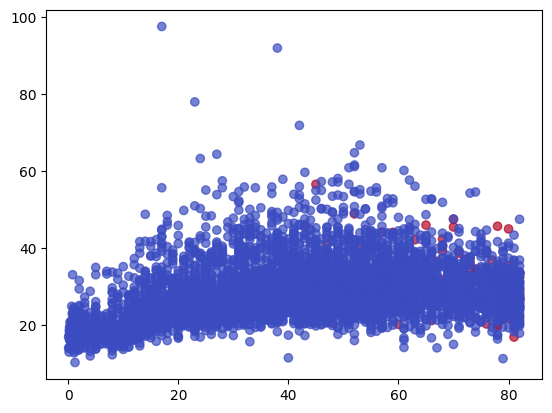

In [79]:
plt.scatter(df['age'], df['bmi'], c=df['stroke'], cmap='coolwarm', alpha=0.7)

logistic regresion

In [72]:
import copy

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))                          
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)         
        err_i  = f_wb_i  - y[i]                      
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]    
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                 
    dj_db = dj_db/m                                

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

    return w, b, J_history 

w_tmp  = np.zeros_like(X[0])
b_tmp  = 0.
alph = 0.0001
iters = 10000

w_out, b_out, _ = gradient_descent(X, y, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.4728192919596552   
Iteration 1000: Cost 0.2051563395497797   
Iteration 2000: Cost 0.19147469998435604   
Iteration 3000: Cost 0.18457615677971867   
Iteration 4000: Cost 0.1809954809823582   
Iteration 5000: Cost 0.1790802995260921   
Iteration 6000: Cost 0.17802368183758258   
Iteration 7000: Cost 0.17742210987034843   
Iteration 8000: Cost 0.17706792325150286   
Iteration 9000: Cost 0.17685115387840125   

updated parameters: w:[-0.01134075  0.03755019  0.00659962  0.0043345  -0.01330564 -0.00767232
  0.00069313 -0.17718343 -0.00331716], b:-0.01582274261962523


Cost Function vs Iteration

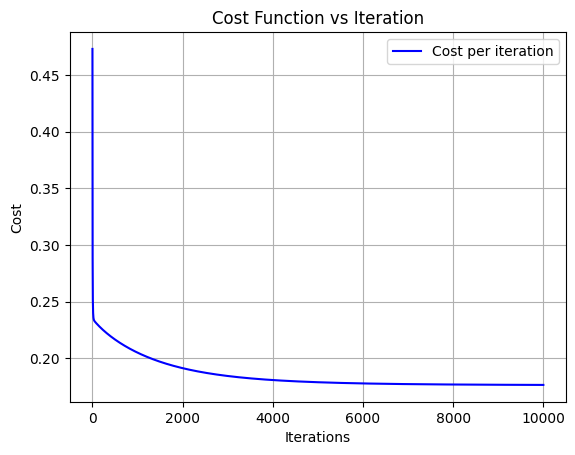

In [76]:
plt.figure()
plt.plot(range(len(_)), _, '-b', label='Cost per iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.grid(True)


Prediction

In [78]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

evaluation

In [109]:
y_pred_proba = predict(X, w_out, b_out)

y_pred = (y_pred_proba >= 0.5).astype(int)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.68%
